In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
# Load the pkl file

with open("saved_data/double_fd_raman/902rjbig/double_fd_raman_902rjbig_960000.pkl", "rb") as f:
    data = pickle.load(f)

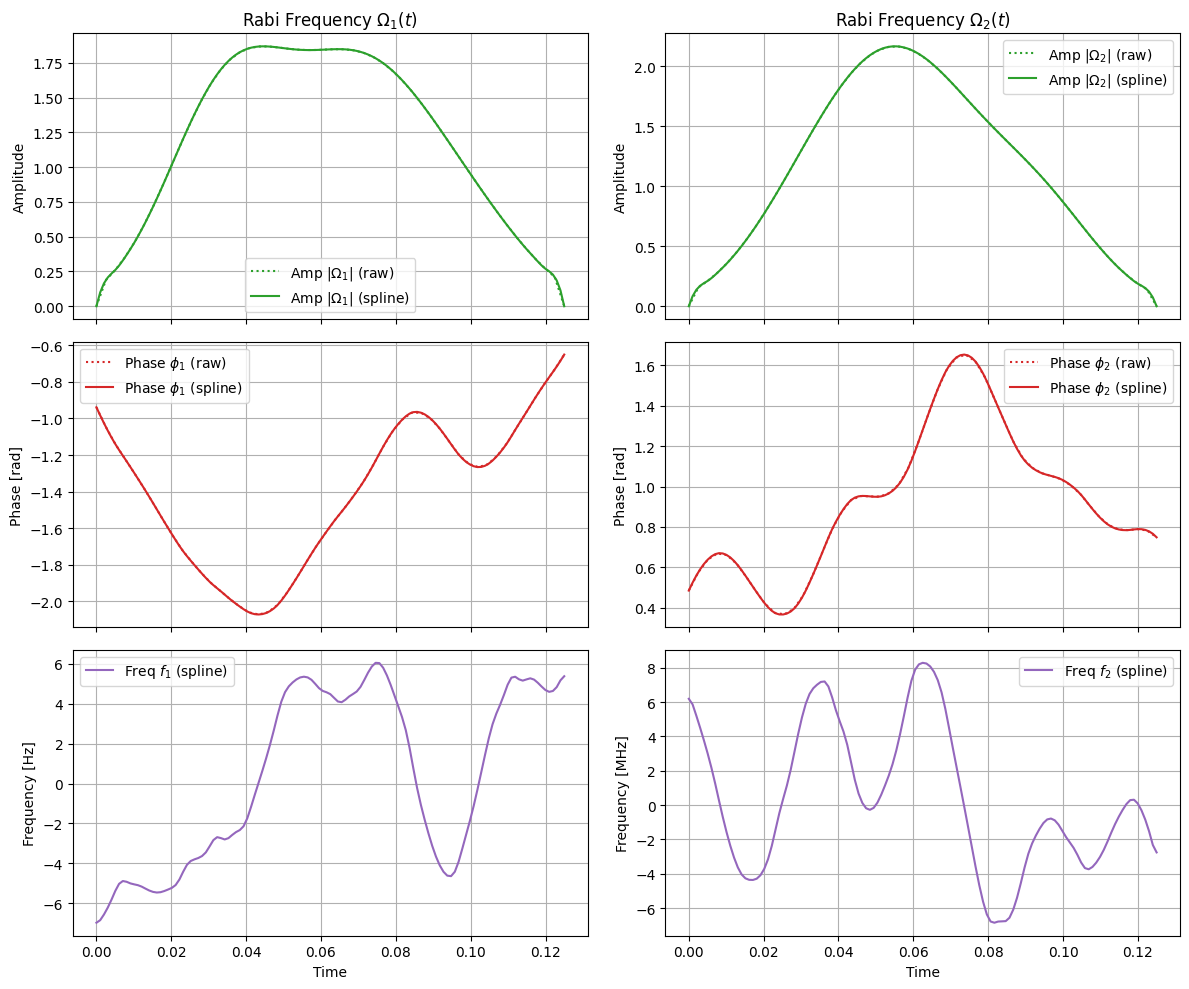

In [4]:
# Unpack real and imaginary parts
real_1, imag_1, real_2, imag_2, _, _ = data

# Convert to numpy arrays
real_1 = np.array(real_1)
phase_1 = np.array(imag_1)
real_2 = np.array(real_2)
phase_2 = np.array(imag_2)

# Time setup
t_final = 0.125
num_points = len(real_1)
t_list = np.linspace(0, t_final, num_points)
t_fine = np.linspace(0, t_final, int(t_final * 1000))

# Interpolation
cs_real_1 = CubicSpline(t_list, real_1)
cs_phase_1 = CubicSpline(t_list, imag_1)
cs_real_2 = CubicSpline(t_list, real_2)
cs_phase_2 = CubicSpline(t_list, imag_2)

# Interpolated complex Rabi frequencies
omega_1_fine = cs_real_1(t_fine)
omega_2_fine = cs_real_2(t_fine)

phase_1_fine = cs_phase_1(t_fine)
phase_2_fine = cs_phase_2(t_fine)

# Frequency from phase gradient
freq_1 = np.gradient(phase_1_fine, t_fine) / (2 * np.pi)
freq_2 = np.gradient(phase_2_fine, t_fine) / (2 * np.pi)

# Save interpolated data

np.savetxt(f"exported_waveforms/amplitude_omega_1_{t_final}mus_smooth_phase.txt", omega_1_fine)
np.savetxt(f"exported_waveforms/phase_omega_1_{t_final}mus_smooth_phase.txt", phase_1_fine)
np.savetxt(f"exported_waveforms/frequency_omega_1_{t_final}mus_smooth_phase.txt", freq_1)
np.savetxt(f"exported_waveforms/amplitude_omega_2_{t_final}mus_smooth_phase.txt",omega_2_fine)
np.savetxt(f"exported_waveforms/phase_omega_2_{t_final}mus_smooth_phase.txt",
           phase_2_fine)
np.savetxt(f"exported_waveforms/frequency_omega_2_{t_final}mus_smooth_phase.txt", freq_2)


# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

# Ω₁ plots

axs[0, 0].plot(t_list, real_1, label="Amp $|\Omega_1|$ (raw)", color="tab:green", linestyle=':')
axs[0, 0].plot(t_fine, omega_1_fine, label="Amp $|\Omega_1|$ (spline)", color="tab:green")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[1, 0].plot(t_list, phase_1, label="Phase $\\phi_1$ (raw)", color="tab:red", linestyle=':')
axs[1, 0].plot(t_fine, phase_1_fine, label="Phase $\\phi_1$ (spline)", color="tab:red")
axs[1, 0].set_ylabel("Phase [rad]")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[2, 0].plot(t_fine, freq_1, label="Freq $f_1$ (spline)", color="tab:purple")
axs[2, 0].set_ylabel("Frequency [Hz]")
axs[2, 0].set_xlabel("Time")
axs[2, 0].legend()
axs[2, 0].grid(True)


axs[0, 1].plot(t_list, real_2, label="Amp $|\Omega_2|$ (raw)", color="tab:green", linestyle=':')
axs[0, 1].plot(t_fine, omega_2_fine, label="Amp $|\Omega_2|$ (spline)", color="tab:green")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 1].plot(t_list, phase_2, label="Phase $\\phi_2$ (raw)", color="tab:red", linestyle=':')
axs[1, 1].plot(t_fine, phase_2_fine, label="Phase $\\phi_2$ (spline)", color="tab:red")
axs[1, 1].set_ylabel("Phase [rad]")
axs[1, 1].legend()
axs[1, 1].grid(True)

axs[2, 1].plot(t_fine, freq_2, label="Freq $f_2$ (spline)", color="tab:purple")
axs[2, 1].set_ylabel("Frequency [MHz]")
axs[2, 1].set_xlabel("Time")
axs[2, 1].legend()
axs[2, 1].grid(True)

# Titles
axs[0, 0].set_title("Rabi Frequency $\Omega_1(t)$")
axs[0, 1].set_title("Rabi Frequency $\Omega_2(t)$")

plt.tight_layout()
plt.show()